# Trabalho prático - Soluções Numéricas em Equações Diferenciais

#### Problema: Temperatura em barra de metal

Nesse trabalho, apresenta-se uma solução numérica para um Problema de Equações Diferenciais Parciais Parabólicos (PDEs), mais especificamente, a tarefa de determinar a temperatura em uma determinada barra de metal via o método explícito de Crank-Nicolson. Considere a equação de calor unidimensional como

$$u_t = c^2u_{xx}$$

onde c é uma constante que indica o coeficiente de difusividade térmica.

Nesse problema a PDE é considerada em um intervalo fixo $0 \leq x \leq L$, com $t \geq 0$ e $0 \leq x \leq 1$. Além disso, contruimos a solução para a temperatura inicial a partir da condição inicial $u(x,0) = f(x)$, onde nesse problema $f(x) = sen(\pi x)$.

A seguir, o algoritmo mostra duas abordagens para as condições de contorno: a primeira diz que as temperaturas das extremidades da barra equivalem a 0ºC, ou seja, $u(0,t) = u(L,t) = 0$.

O script abaixo, efetua a inicialização das variáveis necessárias, criação das malhas numéricas no tempo e no espaço, define a função de solução inicial f(x), define as condições de contorno e a condição inicial para aplicação do algoritmo do Crank-Nicolson no problema.


In [1]:
from numpy import *
import numpy as np 
from matplotlib import pyplot

# Declaração de algumas constantes

L = 1
n = 5
tf = 0.2

u = np.zeros(n+1)
u0 = u.copy()

h = 0.2
dt = 0.04
dx = L/n
k = 1
g = 0

f = lambda x: np.sin(np.pi*x) # condição inicial

X = np.linspace(0,L,n+1) # no espaço
I = np.linspace(0,tf,n+1) 

u_0 = 0
u_2 = 0

# Abaixo foi feito uma modificação nas condições de contorno
# A condição de contorno abaixo é denominada cc de Newmann
#D_u0 = float(20.)/float(100.)
#D_u2 = 0.2 * D_u0
 
#u_0 = float(D_u2*dt)/float((2.*dx*dx))
#u_2 = float(D_u0*dt)/float((2.*dx*dx))

def initt(f,u0,X):
    for i in range(len(u0)):
        u0[i] = f(X[i])
    return u0
u0 = initt(f,u0,X)

#### O método de Crank-Nicolson

Uma aproximação de diferenças finitas para a PDE é dada por

$$\frac{1}{k}(u_{i,j+1}-u_{ij}) = \frac{1}{h^2}(u_{i-1,j}-2u_{ij}+u_{i-1,j})$$

isola-se $u_{i,j+1}$, e obtém-se

$$u_{i,j+1} = (1-2r)u{ij}+r(u_{i+1,j}+u_{i-1,j})$$ com $r = \frac{k}{h^2}$

A convergência do método é dado pela seguinte condição:

$$r = \frac{k}{h^2} \leq \frac{1}{2}$$

Na função CN definida abaixo, o problema é solucionado na forma matricial e posteriormente após obter uma matriz tridiagonal, ela é resolvida através do Algoritmo de Thomas a partir da linha 27.

In [2]:
def CN(u,u0,u_0,u_2,h,dt,dx,k,g):
    n = len(u)
    A = np.zeros((n,n))
    b = np.zeros(n)
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)
    lan = (dt*k)/(2*h**2)
    lan1 = 1+2*lan
    lan2 = 1-2*lan
    # Condições de contorno
    A[0,0] = 1 
    A[0,1] = 0
    A[n-1,n-1] = 1
    A[n-1,n-2] = 0
    b = np.zeros(n)
    b[0] = u_0
    b[n-1] = u_2
    for i in range(1,n-1):
        A[i,i-1] = -lan
        A[i,i] = 1+2*lan
        A[i,i+1] = -lan
        b[i] = lan*u0[i-1]+lan2*u0[i]+lan*u0[i+1]+g
    
    #u = np.linalg.solve(A,b)
    a = A.diagonal(-1) # Diagonal Inferior
    d = A.diagonal() # Diagonal principal
    c = A.diagonal(1) # Diagonal Superior
    
    n = len(d)
    
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/d[0]
    g[0] = b[0]/d[0]

    for i in range(1,n-1):
        w[i] = c[i]/(d[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (b[i] - a[i-1]*g[i-1])/(d[i] - a[i-1]*w[i-1])
    u[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        u[i-1] = g[i-1] - w[i-1]*u[i]
    return u 

Com as soluções armazenadas, por fim, realiza-se a plotagem dos gráficos.

[0.00000000e+00 5.87785252e-01 9.51056516e-01 9.51056516e-01
 5.87785252e-01 1.22464680e-16]
[0.         0.39927376 0.64603851 0.64603851 0.39927376 0.        ]
[0.         0.27122071 0.43884432 0.43884432 0.27122071 0.        ]
[0.         0.18423618 0.2981004  0.2981004  0.18423618 0.        ]
[0.         0.12514889 0.20249516 0.20249516 0.12514889 0.        ]
[0.         0.08501178 0.13755194 0.13755194 0.08501178 0.        ]


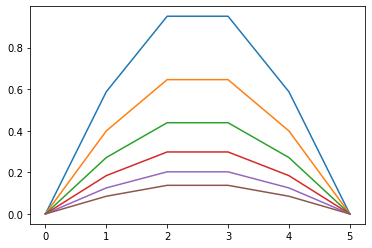

In [3]:
import matplotlib.pyplot as plt
print(u0)
pyplot.plot(u0)
for t0 in I[1:]:
    u = CN(u,u0,u_0,u_2,h,dt,dx,k,g)
    u0 = u.copy()
    print(u0)
    pyplot.plot(u0)
pyplot.show()

#### Experimentos adicionais: Quando r = 0.25 e dt = 0.01, nesse caso a condição de estabilidade é satisfeita.


[0.00000000e+00 5.87785252e-01 9.51056516e-01 9.51056516e-01
 5.87785252e-01 1.22464680e-16]
[0.005      0.53472221 0.86445406 0.86463755 0.53674056 0.025     ]
[0.005      0.4868755  0.78596764 0.78671673 0.49217976 0.025     ]
[0.005      0.44321213 0.71490069 0.71639677 0.45061921 0.025     ]
[0.005      0.40346886 0.65051513 0.65266938 0.41227814 0.025     ]
[0.005      0.36734665 0.59213819 0.59480622 0.37711444 0.025     ]


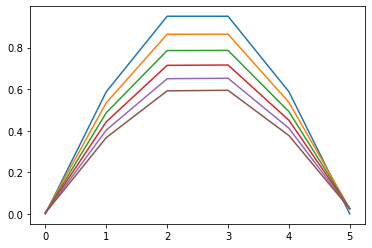

In [4]:
from numpy import *
import numpy as np 
from matplotlib import pyplot

# Declaração de algumas constantes

u = np.zeros(n+1)
u0 = u.copy()

dt = 0.01

f = lambda x: np.sin(np.pi*x) # condição inicial

X = np.linspace(0,L,n+1) # no espaço
I = np.linspace(0,tf,n+1) 

#u_0 = 0
#u_2 = 0

# Abaixo foi feito uma modificação nas condições de contorno
# A condição de contorno abaixo é denominada cc de Newmann
D_u0 = float(20.)/float(100.)
D_u2 = 0.2 * D_u0
u_0 = float(D_u2*dt)/float((2.*dx*dx))
u_2 = float(D_u0*dt)/float((2.*dx*dx))

def initt(f,u0,X):
    for i in range(len(u0)):
        u0[i] = f(X[i])
    return u0
u0 = initt(f,u0,X)

print(u0)
pyplot.plot(u0)
for t0 in I[1:]:
    u = CN(u,u0,u_0,u_2,h,dt,dx,k,g)
    u0 = u.copy()
    print(u0)
    pyplot.plot(u0)
pyplot.show()

#### Experimentos adicionais: Quando r = 2.5 e dt = 0.1, nesse caso a condição de estabilidade é satisfeita.



[0.00000000e+00 5.87785252e-01 9.51056516e-01 9.51056516e-01
 5.87785252e-01 1.22464680e-16]
[0.         0.20788602 0.33636665 0.33636665 0.20788602 0.        ]
[0.         0.07352447 0.11896509 0.11896509 0.07352447 0.        ]
[0.        0.0260039 0.0420752 0.0420752 0.0260039 0.       ]
[0.         0.00919698 0.01488102 0.01488102 0.00919698 0.        ]
[0.         0.00325276 0.00526307 0.00526307 0.00325276 0.        ]


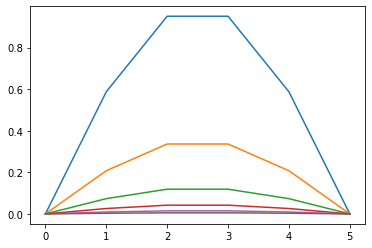

In [5]:
from numpy import *
import numpy as np 
from matplotlib import pyplot

# Declaração de algumas constantes

u = np.zeros(n+1)
u0 = u.copy()
dt = 0.1

f = lambda x: np.sin(np.pi*x) # condição inicial

X = np.linspace(0,L,n+1) # no espaço
I = np.linspace(0,tf,n+1) 

u_0 = 0
u_2 = 0

# Abaixo foi feito uma modificação nas condições de contorno
# A condição de contorno abaixo é denominada cc de Newmann
#D_u0 = float(20.)/float(100.)
#D_u2 = 0.2 * D_u0
 
#u_0 = float(D_u2*dt)/float((2.*dx*dx))
#u_2 = float(D_u0*dt)/float((2.*dx*dx))

def initt(f,u0,X):
    for i in range(len(u0)):
        u0[i] = f(X[i])
    return u0
u0 = initt(f,u0,X)

print(u0)
pyplot.plot(u0)
for t0 in I[1:]:
    u = CN(u,u0,u_0,u_2,h,dt,dx,k,g)
    u0 = u.copy()
    print(u0)
    pyplot.plot(u0)
pyplot.show()